# Elementary Quantum Gates
---

This notebook contains some examples of elementary quantum operations

In [1]:
#Dependencies
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

#-----------------------------------------------------
# Import the Aer backend qasm simulator:
backend_sim = Aer.get_backend('qasm_simulator')

# default number of shots to use:
N_SHOTS = 100
#-----------------------------------------------------

## The NOT Operator

---

The Hadamard operator has the form:

$$\mathbf{H} = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix} \quad\text{ where  }\quad \mathbf{H}\begin{bmatrix}c_0 \\ c_1\end{bmatrix} = \begin{bmatrix} c_1 \\ c_0\end{bmatrix}$$

It flips the 0 component of a state to 1 and the 1 component to 0.

NOT (X) Operation:


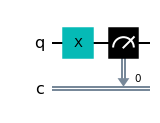

In [2]:
# The initial circuit state is the conventional '0' state:
X_circ = QuantumCircuit(1,1)
X_circ.x(0)
X_circ.measure(0,0)
print('NOT (X) Operation:')
X_circ.draw('mpl')

Results of 100 samples from NOT gate:


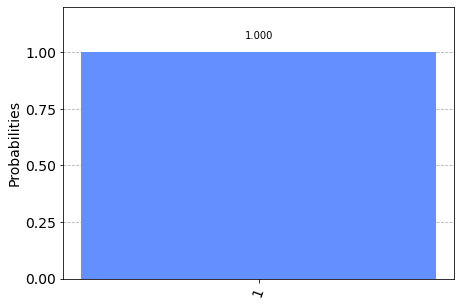

In [3]:
job_sim = execute(X_circ, backend_sim, shots=N_SHOTS)
print(f'Results of {N_SHOTS} samples from NOT gate:')
plot_histogram(job_sim.result().get_counts())

## The Hadamard Operator

---

The Hadamard operator has the form:

$$\mathbf{H} = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}\quad \text{ where} \quad\mathbf{H}\begin{bmatrix}c_0 \\ c_1\end{bmatrix} = \begin{bmatrix} \frac{c_0 + c_1}{\sqrt{2}} \\ \frac{c_0 - c_2}{\sqrt{2}}\end{bmatrix}$$

It converts a classical bit state (0 or 1) into a superposition of both 0 and 1.

Hadamard Operation:


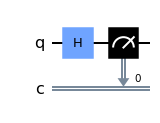

In [4]:
# The initial circuit state is the conventional '0' state:
H_circ = QuantumCircuit(1,1)
H_circ.h(0)
H_circ.measure(0,0)
print('Hadamard Operation:')
H_circ.draw('mpl')

Results of 100 samples from Hadamard gate:


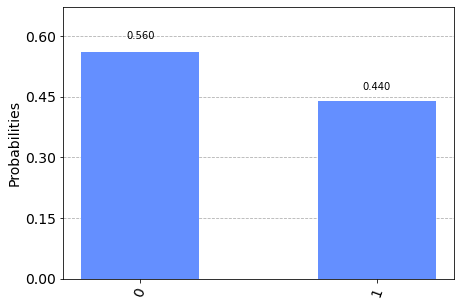

In [5]:
job_sim = execute(H_circ, backend_sim, shots=N_SHOTS)
print(f'Results of {N_SHOTS} samples from Hadamard gate:')
plot_histogram(job_sim.result().get_counts())

## The Conditional NOT (CNOT) Operator

---

The Conditional NOT (CNOT) operator is a 2-qubit operator with the form:

$$\mathbf{C^X_{01}} = \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}\quad \text{ where} \quad\mathbf{C^X_{01}}\begin{bmatrix}c_{00} \\ c_{01} \\ c_{11} \\ c_{10}\end{bmatrix} = \begin{bmatrix}c_{00} \\ c_{01} \\ c_{10} \\ c_{11}\end{bmatrix}$$

It operates on two qubits, switching the '1' and '0' amplitudes of the second qubit proportionate to the '1' amplitude of the first qubit.

CNOT Operation:


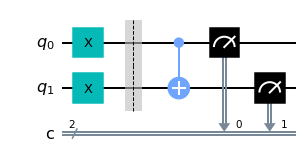

In [6]:
# The initial circuit state is the conventional '0' state, 
# but we will flip the initial states to the '1' states using
# 'X' gates to show how the gate works: 
Cx_circ = QuantumCircuit(2,2)
Cx_circ.x([0,1])
Cx_circ.barrier()
Cx_circ.cx(0,1)
Cx_circ.measure([0,1],[0,1])
print('CNOT Operation:')
Cx_circ.draw('mpl')

Results of 100 samples from CNOT gate (with initial "1" states):


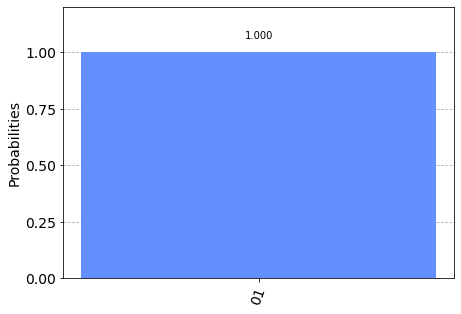

In [7]:
job_sim = execute(Cx_circ, backend_sim, shots=N_SHOTS)
print(f'Results of {N_SHOTS} samples from CNOT gate (with initial "1" states):')
plot_histogram(job_sim.result().get_counts())

## Quantum Entanglement With Elementary Operators:

---

We can achieve quantum entanglement using Hadamard operators and CNOT operators:


Quantum entanglement example circuit:


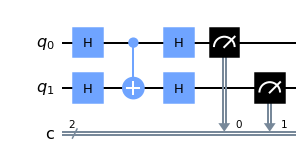

In [8]:
ent_circ = QuantumCircuit(2,2)
ent_circ.h([0,1])
ent_circ.cx(0,1)
ent_circ.h([0,1])
ent_circ.measure([0,1],[0,1])
print('Quantum entanglement example circuit:')
ent_circ.draw('mpl')

Results of 100 samples from entanglement circuit:


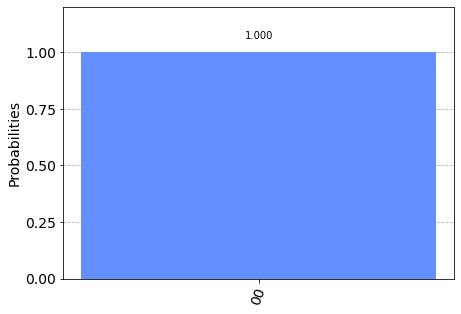

In [9]:
job_sim = execute(ent_circ, backend_sim, shots=N_SHOTS)
print(f'Results of {N_SHOTS} samples from entanglement circuit:')
plot_histogram(job_sim.result().get_counts())